***IMPORTING THE LIBRARIES AND LOADING THE DATASET***

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Amazon Sale Report.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (128976, 21)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


***Data information and cleaning***

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [40]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [41]:
df.duplicated().sum()

np.int64(168)

***Sales overview***

/tmp/ipython-input-3175590031.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


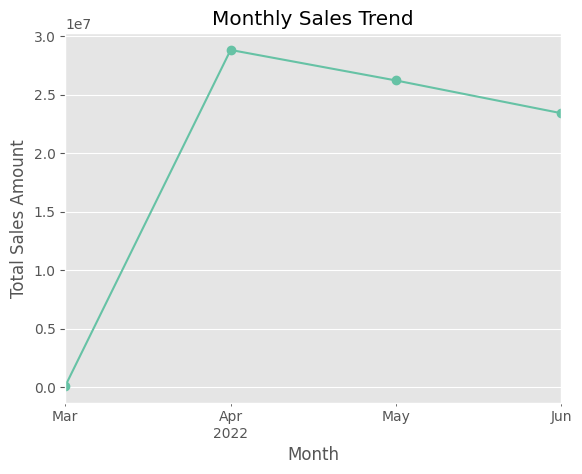

In [42]:
df['Date'] = pd.to_datetime(df['Date'])
# Monthly Sales Trend
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()
plt.figure()
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.show()


In [43]:
print("Total Revenue:", df['Amount'].sum())
print("Total Orders:", df['Order ID'].nunique())
print("Total Quantity Sold:", df['Qty'].sum())
print("Average Order Value:", df['Amount'].mean())


Total Revenue: 78590170.24999997
Total Orders: 120229
Total Quantity Sold: 116646
Average Order Value: 648.5621760909748


***Product analysis***

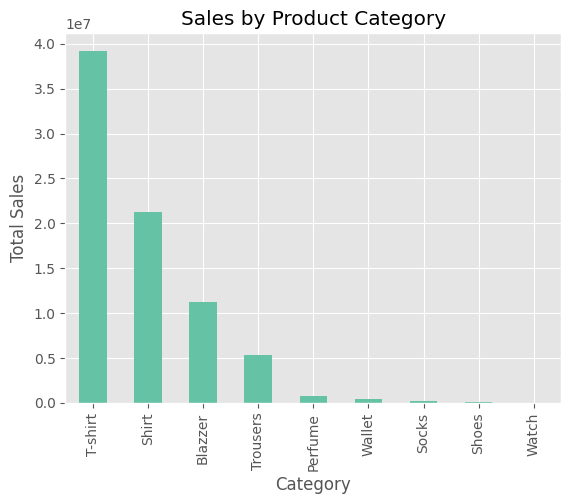

In [44]:
#Category wise sales
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
plt.figure()
category_sales.plot(kind='bar')
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


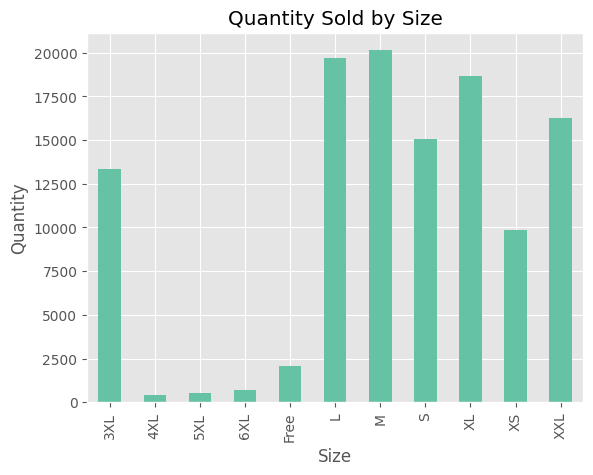

In [45]:
#Size-wise quantity sold
size_qty = df.groupby('Size')['Qty'].sum()
plt.figure()
size_qty.plot(kind='bar')
plt.title("Quantity Sold by Size")
plt.xlabel("Size")
plt.ylabel("Quantity")
plt.show()


***Fulfillment Analysis***

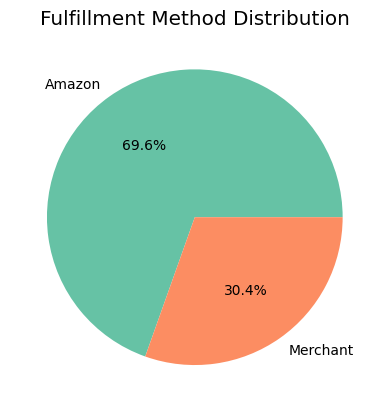

In [46]:
# Fulfillment Method Distribution
fulfillment_count = df['Fulfilment'].value_counts()
plt.figure()
fulfillment_count.plot(kind='pie', autopct='%1.1f%%')
plt.title("Fulfillment Method Distribution")
plt.ylabel("")
plt.show()



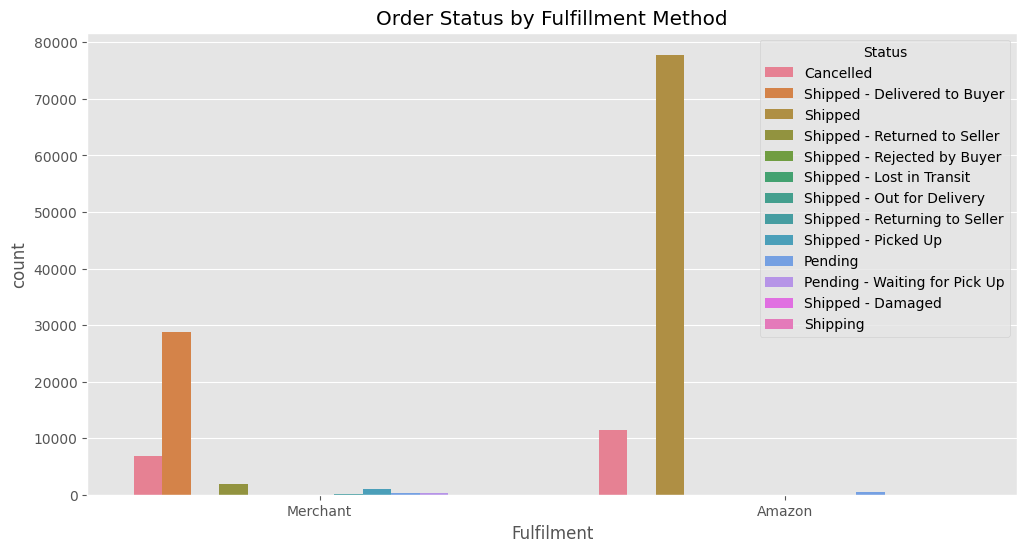

In [47]:
# Order Status vs Fulfillment
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Fulfilment', hue='Status')
plt.title("Order Status by Fulfillment Method")
plt.show()

***Customer segmentation***

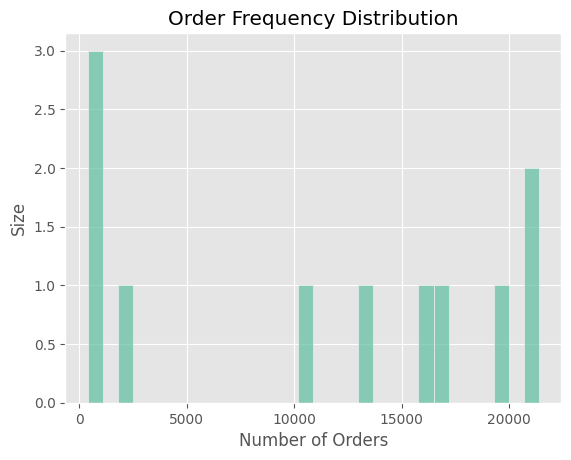

In [48]:
#Orders per size
customer_orders = df.groupby('Size')['Order ID'].nunique()
plt.figure()
sns.histplot(customer_orders, bins=30)
plt.title("Order Frequency Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Size")
plt.show()


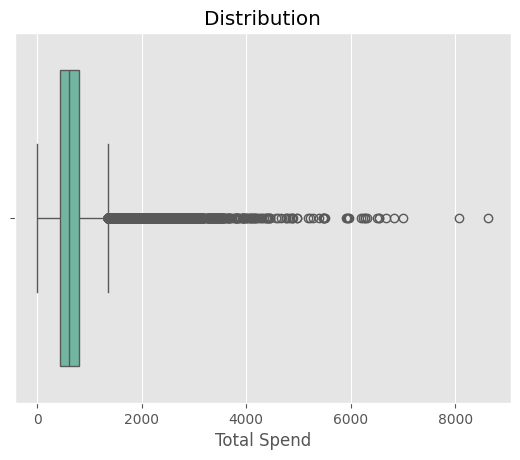

In [49]:
#High vs Low Value Orders
customer_spend = df.groupby('Order ID')['Amount'].sum()
plt.figure()
sns.boxplot(x=customer_spend)
plt.title("Distribution")
plt.xlabel("Total Spend")
plt.show()


***Geographical Analysis***

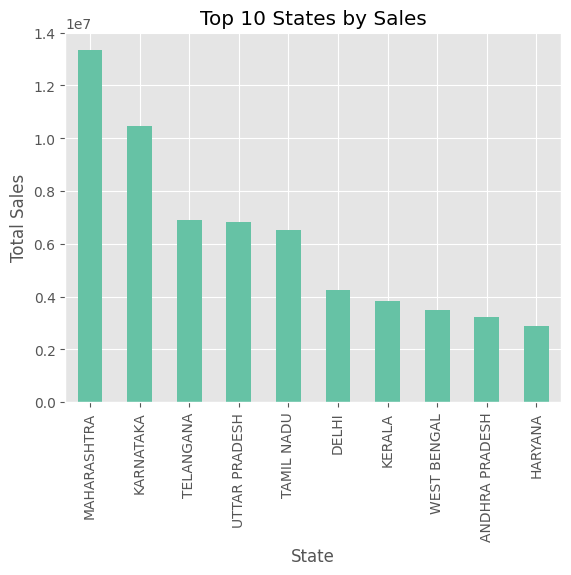

In [50]:
#State wise sales
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure()
state_sales.plot(kind='bar')
plt.title("Top 10 States by Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.show()


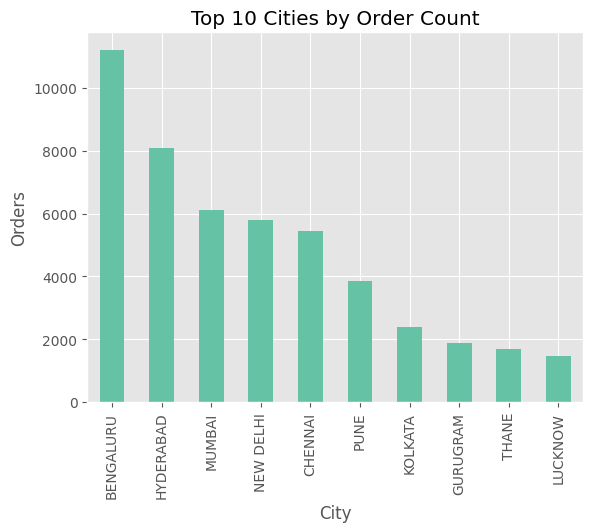

In [51]:
#City-wise Order Count
city_orders = df['ship-city'].value_counts().head(10)
plt.figure()
city_orders.plot(kind='bar')
plt.title("Top 10 Cities by Order Count")
plt.xlabel("City")
plt.ylabel("Orders")
plt.show()


***Business Insights***

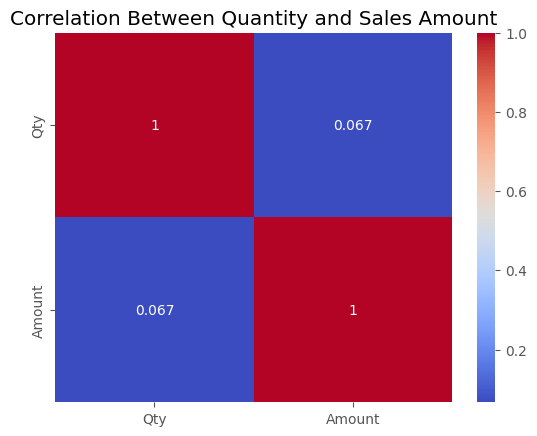

In [52]:
# Correlation Heatmap
plt.figure()
sns.heatmap(df[['Qty', 'Amount']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Quantity and Sales Amount")
plt.show()
